In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
bikes = pd.read_csv("bikes_new.csv")
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Rental count,Normal Humidity,Temperature Category,Rental category,Wind category,IsSnowing,IsRaining,Day category
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,257,False,Freezing,Okay,Gentle,False,False,Night
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,219,False,Freezing,Okay,Light,False,False,Night
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,162,False,Freezing,Okay,Light,False,False,Night
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,148,True,Freezing,Okay,Light,False,False,Night
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,97,False,Freezing,Bad,Gentle,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,False,644,False,Chilly,Good,Gentle,False,False,Day
8461,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,False,359,False,Chilly,Okay,Gentle,False,False,Night
8462,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,False,1236,False,Chilly,Awesome,Light,False,False,Night
8463,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,False,628,True,Chilly,Good,Light,False,False,Night


## Metrics

In [25]:
bikes[["Temperature", "Humidity", "Wind speed", "Rainfall", "Snowfall", "Rental count"]].aggregate(["max", "min",
                                                                                                    "mean", "median"])

,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Rental count
max,39.400000,98.000000,7.400000,35.00000,8.800000,6012.000000
min,-17.800000,0.000000,0.000000,0.00000,0.000000,0.000000
mean,12.766716,58.147194,1.725883,0.14912,0.077685,720.857531
median,13.500000,57.000000,1.500000,0.00000,0.000000,455.000000


## To drop?

In [14]:
bikes[bikes['Rental count'] == 0]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Rental count,Normal Humidity,Temperature Category,Rental category,Wind category,IsSnowing,IsRaining,Day category
749,2018-01-01,5,-4.4,54,0.8,0.0,0.0,Winter,False,0,True,Freezing,Bad,Light,False,False,Night
3411,2018-04-23,3,9.9,93,2.3,0.5,0.0,Spring,False,0,False,Chilly,Bad,Gentle,False,True,Night
5062,2018-07-01,22,21.7,97,0.7,3.5,0.0,Summer,False,0,False,Nice,Bad,Light,False,True,Night


In [15]:
bikes['Rental category'].value_counts()

Okay       3236
Good       2278
Awesome    1699
Bad        1252
Name: Rental category, dtype: int64

In [16]:
bikes['Wind category'].value_counts()

Light       4315
Gentle      4116
Moderate      34
Name: Wind category, dtype: int64

In [17]:
bikes["Temperature Category"].value_counts()

Chilly      3061
Nice        2668
Freezing    1438
Hot         1298
Name: Temperature Category, dtype: int64

In [18]:
bikes["Normal Humidity"].value_counts()

False    5540
True     2925
Name: Normal Humidity, dtype: int64

In [19]:
bikes[bikes['Rental category'] == 'Bad']['Seasons'].value_counts()

Winter    638
Spring    335
Summer    143
Autumn    136
Name: Seasons, dtype: int64

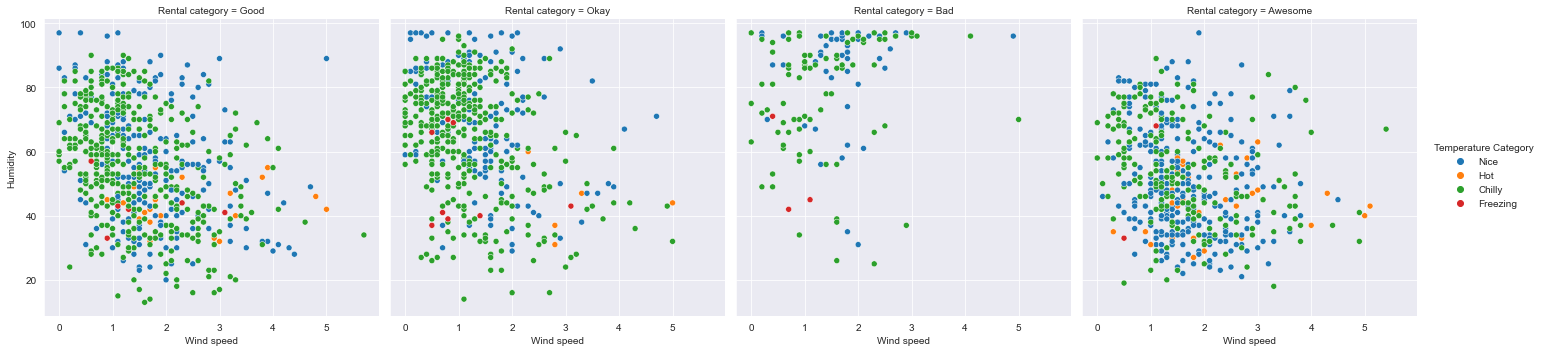

In [23]:
sns.relplot(
    data=bikes[bikes["Seasons"] == 'Autumn'],
    x="Wind speed",
    y="Humidity",
    # hue = "Rental category",
    col = "Rental category",
    hue = "Temperature Category",
    kind = "scatter"
);

## Hypoteza: !normal humidity -> Rental category (bad)

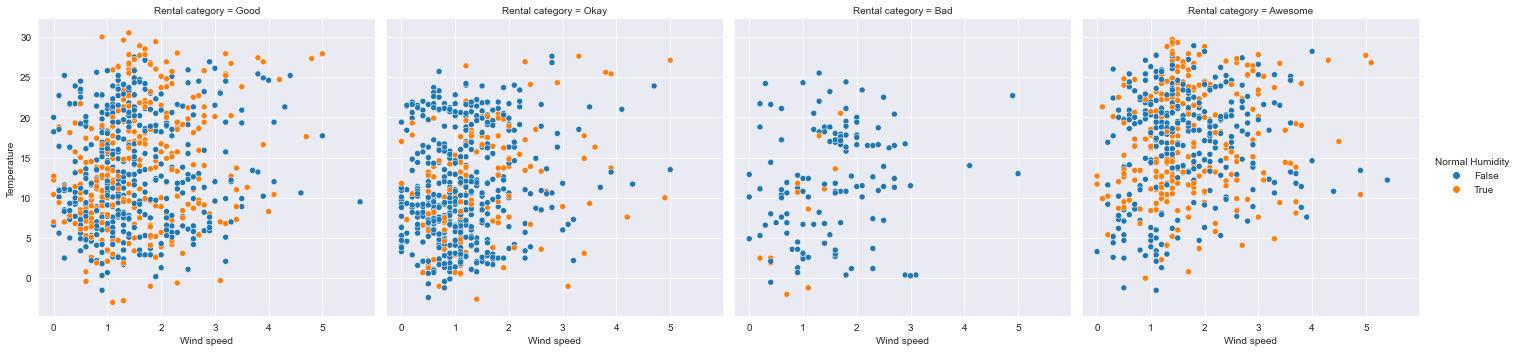

In [24]:
sns.relplot(
    data=bikes[bikes["Seasons"] == 'Autumn'],
    x="Wind speed",
    y="Temperature",
    col="Rental category",
    hue="Normal Humidity",
    kind="scatter"
);